In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Phishing_Legitimate_full.csv to Phishing_Legitimate_full.csv


In [ ]:
data = pd.read_csv("Phishing_Legitimate_full.csv")

In [ ]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')
    
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [ ]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

**View the data**

Lets look at random 5 rows from the dataset, it seems like we have mix of ranged data, some column have smaller range compared to others

In [ ]:
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
3126,3127,3,1,8,153,3,1,0,0,0,0,0,0,0,37,1,1,0,0,1,0,20,126,0,0,0,0,0.000000,0.041667,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,1,0,1,1
5643,5644,1,0,5,61,5,0,0,0,0,0,0,0,0,8,1,1,0,0,0,0,9,45,0,0,0,0,0.337209,0.154762,0,0,0,0,0,0.034884,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
8091,8092,2,0,2,62,0,0,0,0,0,0,3,2,0,5,1,1,0,0,1,0,14,16,24,0,0,0,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0
2578,2579,2,0,6,81,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,21,53,0,0,0,0,0.750000,0.058824,1,1,0,0,0,0.000000,0,0,0,0,0,1,0,0,1,-1,1,1,1,-1,1
4517,4518,2,0,3,44,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9,28,0,0,0,0,0.923077,1.000000,0,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,1,1,1,-1,-1,1


**Summary Statistics**

By using the describe method, we can see some of the columns have high variance and some have smaller variance, this is due to the fact that some of the column have bigger values and bigger ranges

In [ ]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000

**Balance/Imbalanced Data**

The data is balanced for non-phising and phising label

<AxesSubplot:>

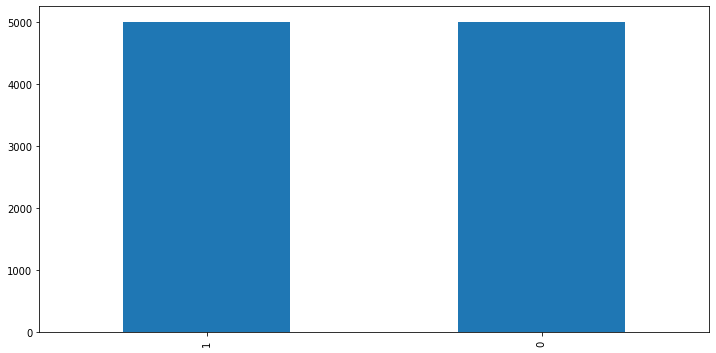

In [ ]:
data['labels'].value_counts().plot(kind='bar')

**Spearman Correlation**

By looking the spearman correlation, we can find which features are linearly correlated in terms of predicting if a site is phising or not

In [ ]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

**First 10 columns**

By looking at the first 10 columns against labels, we can concluded that non of the features have strong correlation with the labels, however, NumDash has some significant negative effect towards the labels, which could mean if there is less number of dash then it is more likely to be phising site

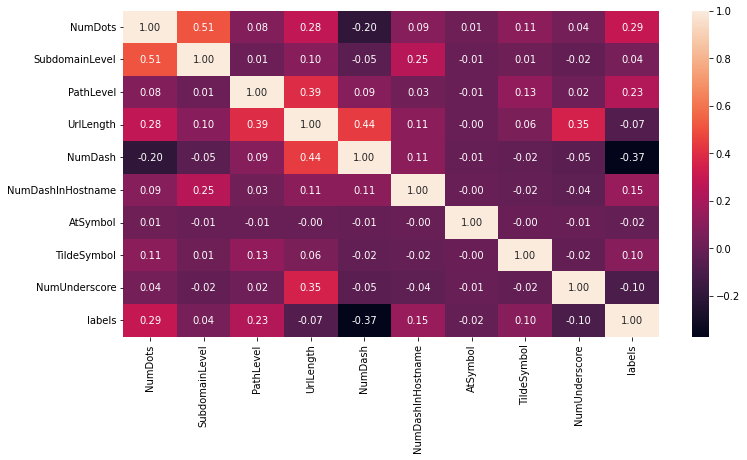

In [ ]:
corr_heatmap(data, 0, 10)

**Columns 10 to 20**

There are no strong or even medium level strength correlation features with labels

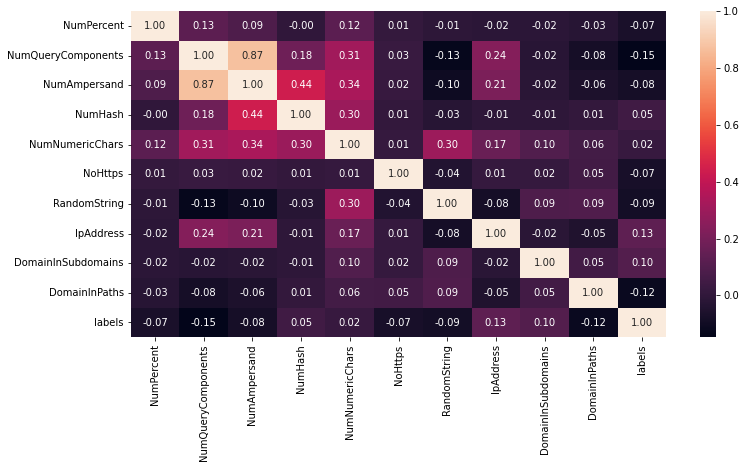

In [ ]:
corr_heatmap(data, 10, 20)

**Columns 20 to 30**

No strong correlation feature

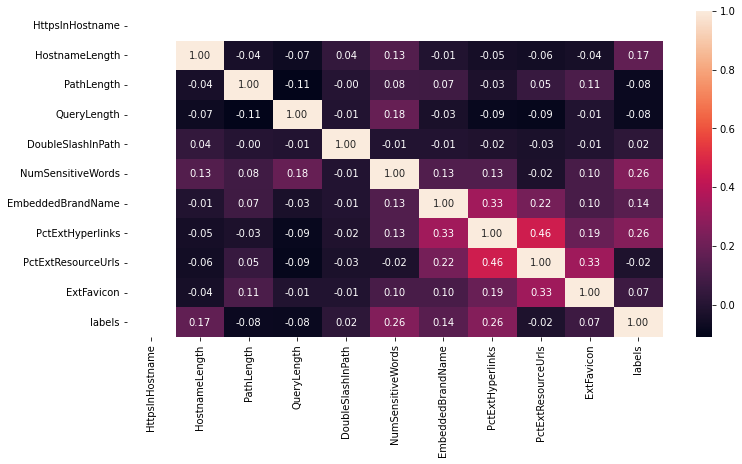

In [ ]:
corr_heatmap(data, 20, 30)

**Columns 30 to 40**

Well here we have a few features that are linearly correlated to our dep variable

InsecureForms shows that as the value is higher so the probability of being a phising site
PctNullSelfRedirectHyperlinks shows the same positive correlation as InsecureForms
FequentDomainNameMismatch shows that it has medium linear correlation in positive direction
SubmitInfoToEmail seems to indicate that sites that ask users to submit their details to emails seems to be more high probability for phising

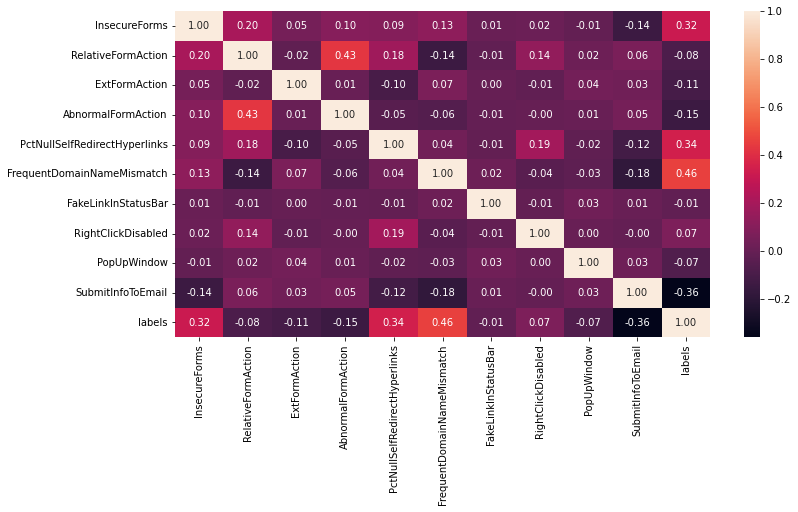

In [ ]:
corr_heatmap(data, 30, 40)

**Columsn 40 to 50**

The only column in this group that has some correlation with labels is PctExtNullSelfRedirectHyperlinksRT and it has negative effect towards labels which could mean that when the number of percent of null self redirect hyperlinks occur hence the probabiliy of phising increases

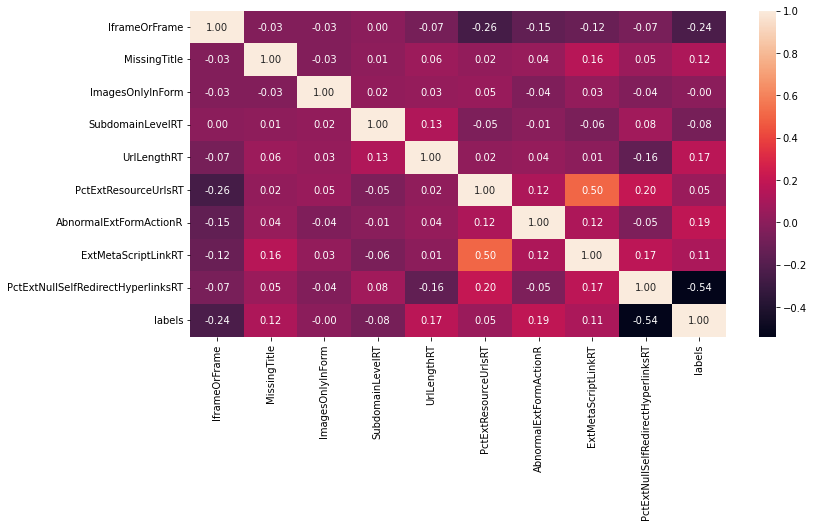

In [ ]:
corr_heatmap(data, 40, 50)

**Mutual Info**

We will use mutual info classifier to find non linear and linear correlation betweem the features and labels

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']

In [ ]:
discrete_features = X.dtypes == int

Here we process the scores and we can see that now mutual info is showing a bit different list from spearman corr

In [ ]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      0.467182
PctExtResourceUrls                    0.291872
PctNullSelfRedirectHyperlinks         0.231657
PctExtNullSelfRedirectHyperlinksRT    0.216565
NumNumericChars                       0.135023
FrequentDomainNameMismatch            0.120904
ExtMetaScriptLinkRT                   0.118712
NumDash                               0.112723
SubmitInfoToEmail                     0.074381
NumDots                               0.064261
InsecureForms                         0.059528
PathLength                            0.058810
PathLevel                             0.049891
UrlLength                             0.045643
QueryLength                           0.042989
NumSensitiveWords                     0.038086
NumQueryComponents                    0.032624
IframeOrFrame                         0.030463
PctExtResourceUrlsRT                  0.030360
HostnameLength                        0.028099
NumAmpersand                          0.019897
IpAddress    

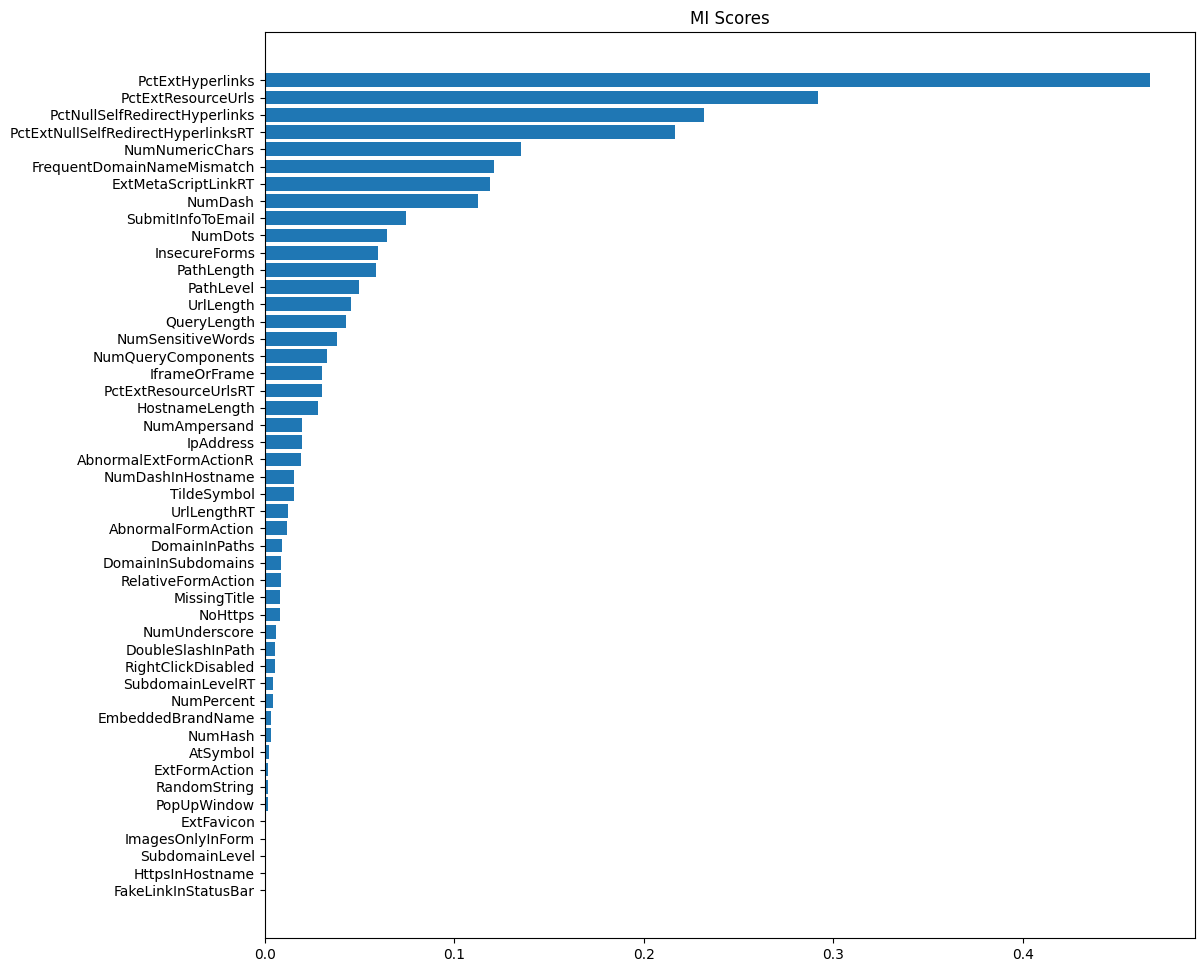

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

**Prediction**

We will first use logistic regression as for baseline, then try to beat the baseline using random forest classifer

Our evaluation metrics will be accuracy, precision, recall and f1 score

Below we import all the required modules

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Train logistic models**

This method is to perform a repetative training process using logistic regression model, the purpose for this is to find the optimal number of features that can be used to find the best fitted model without adjusting much of the hyperparameters, hence the idea here is to go with Data-Centric training, basically the method takes number of top N features to be used for training the model and all the evaluation metrics are returned for evaluation purpose

In [ ]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

Here the loop will be starting from 20 as we will start training with top 20 features up to all 50 features to find optimal number of features needed for this problem.

In [ ]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.9277456647398844, recall : 0.9367704280155642, f1 score : 0.9322362052274926, accuracy : 0.93
Performance for Logistic Model with Top 21 features is precision : 0.9100790513833992, recall : 0.9455852156057495, f1 score : 0.9274924471299094, accuracy : 0.928
Performance for Logistic Model with Top 22 features is precision : 0.9221556886227545, recall : 0.9438202247191011, f1 score : 0.9328621908127208, accuracy : 0.9335
Performance for Logistic Model with Top 23 features is precision : 0.9267822736030829, recall : 0.9303675048355899, f1 score : 0.9285714285714286, accuracy : 0.926
Performance for Logistic Model with Top 24 features is precision : 0.923671497584541, recall : 0.9390962671905697, f1 score : 0.9313200194836824, accuracy : 0.9295
Performance for Logistic Model with Top 25 features is precision : 0.9219219219219219, recall : 0.9426816786079836, f1 score : 0.9321862348178136, accuracy : 0.933
Performance for 

In [ ]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.927746,0.936770,0.932236,0.9300
1,21,0.910079,0.945585,0.927492,0.9280
2,22,0.922156,0.943820,0.932862,0.9335
3,23,0.926782,0.930368,0.928571,0.9260
4,24,0.923671,0.939096,0.931320,0.9295
5,25,0.921922,0.942682,0.932186,0.9330
6,26,0.931001,0.936461,0.933723,0.9320
7,27,0.918582,0.953280,0.935610,0.9340
8,28,0.929119,0.946341,0.937651,0.9355
9,29,0.925144,0.947886,0.936377,0.9345


**Visualize Logistic Reg Performance**

As we can see, the model had ups and downs during the training as more number of features were added, as our target is to maximize all the metrics we have to find the number of features that gives us the best of all metrics.


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

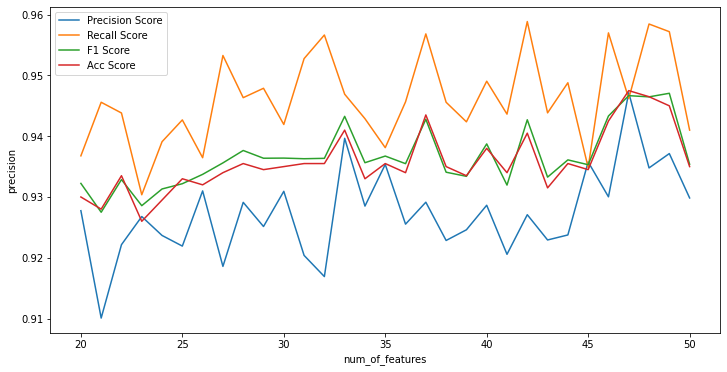

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

**Training Random Forest Classifier**

It is the same method as logistic regression, the only difference is that we are now using random forest classifier for training and trying to beat the logistic baseline.

In [ ]:
def train_rfc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    rfc = RandomForestClassifier(n_estimators=500,  max_depth=32, max_features=1.0)
    
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [ ]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_rfc(data, i)
    print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for RFC Model with Top 20 features is precision : 0.9707070707070707, recall : 0.9786150712830958, f1 score : 0.9746450304259635, accuracy : 0.975
Performance for RFC Model with Top 21 features is precision : 0.976, recall : 0.9838709677419355, f1 score : 0.9799196787148594, accuracy : 0.98
Performance for RFC Model with Top 22 features is precision : 0.9760479041916168, recall : 0.9760479041916168, f1 score : 0.9760479041916168, accuracy : 0.976
Performance for RFC Model with Top 23 features is precision : 0.9733201581027668, recall : 0.9800995024875622, f1 score : 0.9766980664353, accuracy : 0.9765
Performance for RFC Model with Top 24 features is precision : 0.9672131147540983, recall : 0.9852652259332023, f1 score : 0.9761557177615571, accuracy : 0.9755
Performance for RFC Model with Top 25 features is precision : 0.9703476482617587, recall : 0.9753340184994861, f1 score : 0.9728344438749359, accuracy : 0.9735
Performance for RFC Model with Top 26 features is precision 

In [ ]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df.head()

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.970707,0.978615,0.974645,0.9750
1,21,0.976000,0.983871,0.979920,0.9800
2,22,0.976048,0.976048,0.976048,0.9760
3,23,0.973320,0.980100,0.976698,0.9765
4,24,0.967213,0.985265,0.976156,0.9755


**Visualize Random Forest Performance**


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

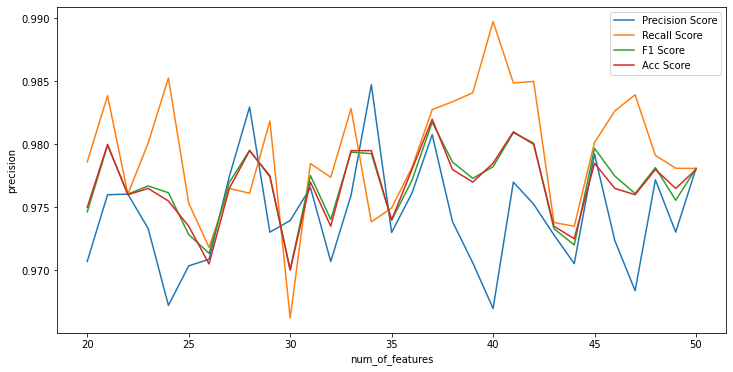

In [ ]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

**Final Random Forest Model**

Lets train the final random forest model based on the optimal N number of features

In [ ]:
top_n_features = mi_scores.sort_values(ascending=False).head(32).index.tolist()
X = data[top_n_features]
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

rfc = RandomForestClassifier(n_estimators=500, max_depth=32, max_features=1.0)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Performance for RFC Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(27, precision, recall, f1, accuracy))

Performance for RFC Model with Top 27 features is precision : 0.97568093385214, recall : 0.9833333333333333, f1 score : 0.9794921875, accuracy : 0.979


**Performance**

The model is now capable of predicting at up to 98% accuracy and precision and recall up to 97%, this shows the model has high confidence in predicting phishing or non-phishing site.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.98      0.98      0.98      1020

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

